In [3]:
#IMPORT STATEMENTS
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import math
file_path = "/Users/willgray/Downloads/phys-258-lab4-part1.csv"
get_data(file_path)

Missing columns for Run #1, skipping.
Missing columns for Run #2, skipping.
Skipping Trial 4 (Excluded).
Trial 1 Fit Parameters:
A = 0.1750 ± 0.0000
B = 0.1871 ± 0.0000
C = -5.4348 ± 0.0000
D = 0.3696 ± 0.0002
E = -0.1529 ± 0.0000
Natural Frequency = 0.8655 ± 0.0003
Chi-squared = 32793.5394
Reduced Chi-squared = 53.8482



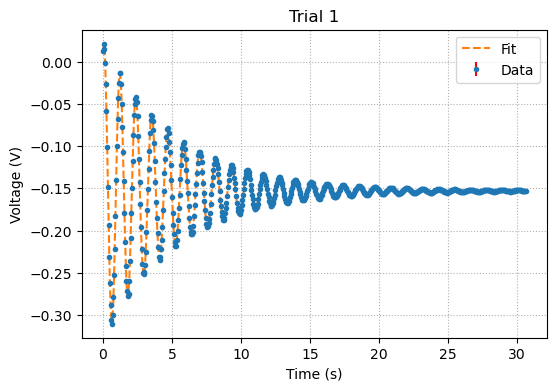

Trial 2 Fit Parameters:
A = 0.1700 ± 0.0000
B = 0.1862 ± 0.0000
C = -5.4352 ± 0.0000
D = -0.3686 ± 0.0002
E = -0.1533 ± 0.0000
Natural Frequency = 0.8655 ± 0.0003
Chi-squared = 117786.1097
Reduced Chi-squared = 191.2112



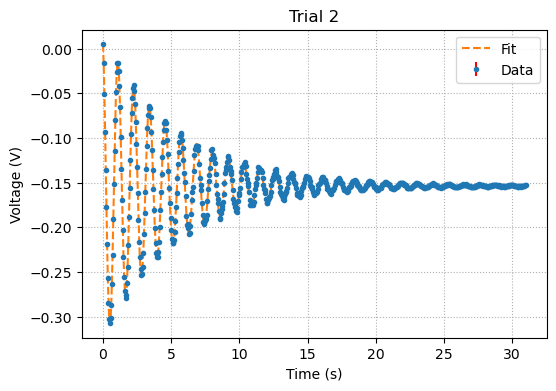

Trial 3 Fit Parameters:
A = 0.1540 ± 0.0000
B = 0.1871 ± 0.0000
C = -5.4347 ± 0.0000
D = 3.0155 ± 0.0002
E = -0.1534 ± 0.0000
Natural Frequency = 0.8655 ± 0.0003
Chi-squared = 26309.7746
Reduced Chi-squared = 41.6954



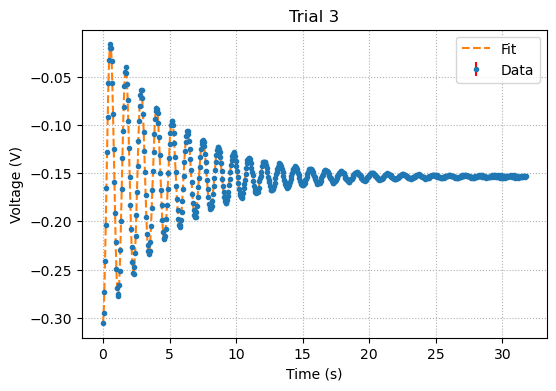

Trial 4 Fit Parameters:
A = 0.1765 ± 0.0000
B = 0.1869 ± 0.0000
C = -5.4347 ± 0.0000
D = 0.6596 ± 0.0002
E = -0.1534 ± 0.0000
Natural Frequency = 0.8655 ± 0.0003
Chi-squared = 74127.5660
Reduced Chi-squared = 122.3227



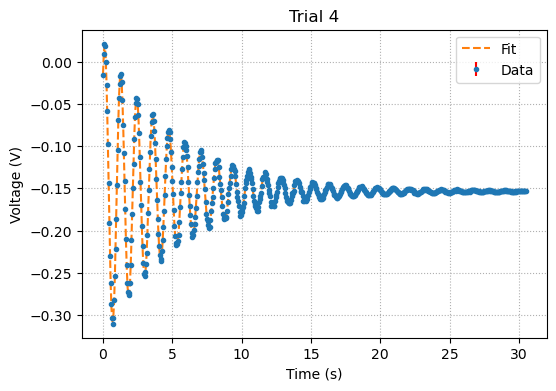

Trial 5 Fit Parameters:
A = -0.1305 ± 0.0000
B = 0.1869 ± 0.0001
C = -5.4339 ± 0.0001
D = 1.3378 ± 0.0002
E = -0.1535 ± 0.0000
Natural Frequency = 0.8653 ± 0.0003
Chi-squared = 12712.2204
Reduced Chi-squared = 20.9773



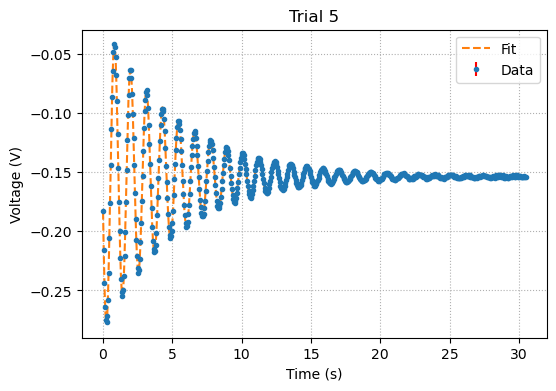

Trial 6 Fit Parameters:
A = 0.1772 ± 0.0000
B = 0.1869 ± 0.0000
C = -5.4348 ± 0.0000
D = 0.6310 ± 0.0002
E = -0.1536 ± 0.0000
Natural Frequency = 0.8655 ± 0.0003
Chi-squared = 27570.8085
Reduced Chi-squared = 45.6470



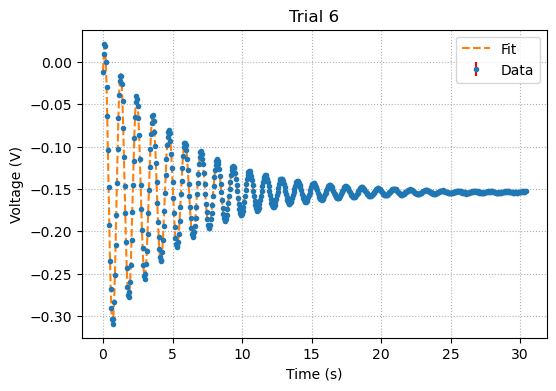

Trial 7 Fit Parameters:
A = 0.1760 ± 0.0000
B = 0.1869 ± 0.0000
C = -5.4346 ± 0.0000
D = 0.6215 ± 0.0002
E = -0.1536 ± 0.0000
Natural Frequency = 0.8654 ± 0.0003
Chi-squared = 21893.0046
Reduced Chi-squared = 36.1271



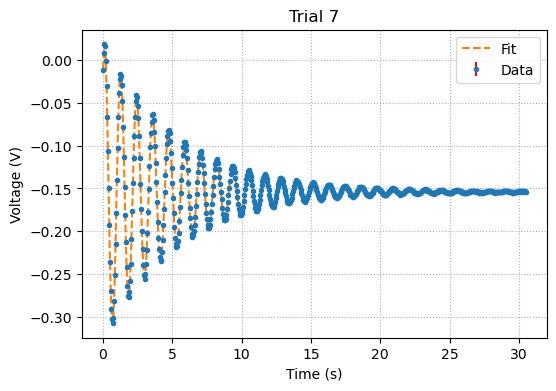

Trial 8 Fit Parameters:
A = 0.1731 ± 0.0000
B = 0.1870 ± 0.0000
C = -5.4342 ± 0.0000
D = 0.0974 ± 0.0002
E = -0.1536 ± 0.0000
Natural Frequency = 0.8654 ± 0.0003
Chi-squared = 18929.7796
Reduced Chi-squared = 31.1858



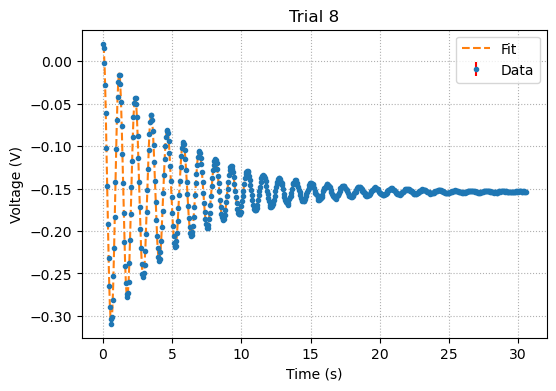

Trial 9 Fit Parameters:
A = 0.1757 ± 0.0000
B = 0.1869 ± 0.0000
C = -5.4343 ± 0.0000
D = 0.5398 ± 0.0002
E = -0.1535 ± 0.0000
Natural Frequency = 0.8654 ± 0.0003
Chi-squared = 46617.4570
Reduced Chi-squared = 77.5665



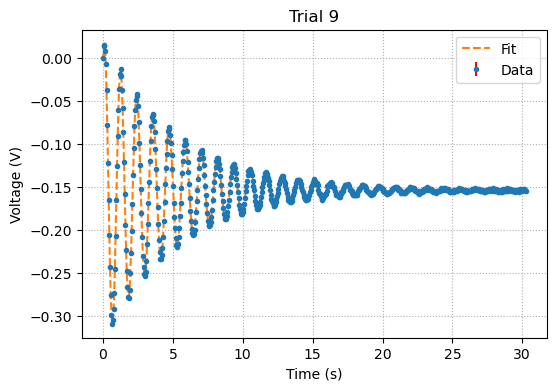


Average Natural Frequency: 0.8654 ± 0.0001


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Function to load and organize data
def get_data(file_path, num_of_trials, exclude_trials=[]):
    list_of_times = []
    list_of_voltages = []

    df = pd.read_csv(file_path)

    for i in range(1, num_of_trials + 1):
        if i in exclude_trials:
            print(f"Skipping Trial {i} (Excluded).")
            continue

        time_col = f"Time (s) Run #{i}"
        voltage_col = f"Voltage, Ch A (V) Run #{i}"  # Change to "Ch B" if needed

        if time_col in df.columns and voltage_col in df.columns:
            times = df[time_col].dropna().values
            voltages = df[voltage_col].dropna().values

            list_of_times.append(times)
            list_of_voltages.append(voltages)
        else:
            print(f"Missing columns for Run #{i}, skipping.")

    return np.array(list_of_times, dtype=object), np.array(list_of_voltages, dtype=object)

# Define the damped harmonic motion model
def model_func(x, A, B, C, D, E):
    return A * np.exp(-B * x) * np.cos(C * x + D) + E

# Trim NaN values
def trim_nans(data):
    return data[:np.argmax(np.isnan(data))] if np.isnan(data).any() else data

# Adjust data to start from the first maximum
def adjust_to_maxima(x_data, y_data):
    max_idx = np.argmax(y_data)
    return x_data[max_idx:] - x_data[max_idx], y_data[max_idx:]

def fit_and_plot(time_points, voltage_points):
    num_trials = len(time_points)
    natural_freq_list = []

    for i in range(num_trials):
        x_data = trim_nans(time_points[i])
        y_data = trim_nans(voltage_points[i])

        if len(x_data) == 0 or len(y_data) == 0:
            print(f"Trial {i+1} has insufficient data for fitting.")
            continue

        # Skip the adjust_to_maxima step
        # x_data, y_data = adjust_to_maxima(x_data, y_data)

        if len(x_data) == 0:
            print(f"Trial {i+1} has no data after maxima adjustment.")
            continue

        initial_guess = [0.1, 0.1, -5, 0, 0]

        try:
            popt, pcov = curve_fit(model_func, x_data, y_data, sigma=0.0001, absolute_sigma=True, p0=initial_guess)
            perr = np.sqrt(np.diag(pcov))
        except RuntimeError:
            print(f"Trial {i+1} fitting failed")
            continue

        B, C = popt[1], popt[2]
        B_err, C_err = perr[1], perr[2]
        natural_frequency = np.sqrt(B**2 + C**2) / (2 * np.pi)
        natural_freq_list.append(natural_frequency)
        natural_frequency_err = (1 / (2 * natural_frequency)) * np.sqrt((2 * B * B_err) ** 2 + (2 * C * C_err) ** 2)

        
        # Chi-squared
        y_fit = model_func(x_data, *popt)
        chi_squared = np.sum(((y_data - y_fit) / 0.0001) ** 2)
        degrees_of_freedom = len(x_data) - len(popt)
        reduced_chi_squared = chi_squared / degrees_of_freedom if degrees_of_freedom > 0 else np.nan

        
        print(f"Trial {i+1} Fit Parameters:")
        print(f"A = {popt[0]:.4f} ± {perr[0]:.4f}")
        print(f"B = {B:.4f} ± {B_err:.4f}")
        print(f"C = {C:.4f} ± {C_err:.4f}")
        print(f"D = {popt[3]:.4f} ± {perr[3]:.4f}")
        print(f"E = {popt[4]:.4f} ± {perr[4]:.4f}")
        print(f"Natural Frequency = {natural_frequency:.4f} ± {natural_frequency_err:.4f}")
        print(f"Chi-squared = {chi_squared:.4f}")
        print(f"Reduced Chi-squared = {reduced_chi_squared:.4f}\n")

        plt.figure(figsize=(6, 4))
        plt.errorbar(x_data, y_data, yerr=0.0001, fmt='o', markersize=3, ecolor='red', label='Data')

        x_fit = np.linspace(np.min(x_data), np.max(x_data), 500)
        y_fit = model_func(x_fit, *popt)
        plt.plot(x_fit, y_fit, linestyle='--', label='Fit')

        plt.xlabel('Time (s)')
        plt.ylabel('Voltage (V)')
        plt.title(f'Trial {i+1}')
        plt.legend()
        plt.grid(True, which='both', linestyle=':')
        plt.savefig(f'trial_{i+1}.png')
        plt.show()

    # Compute average natural frequency and standard deviation as error
    if len(natural_freq_list) > 0:
        avg_natural_freq = np.mean(natural_freq_list)
        std_natural_freq = np.std(natural_freq_list, ddof=1)  # Standard deviation with Bessel's correction
        print(f"\nAverage Natural Frequency: {avg_natural_freq:.4f} ± {std_natural_freq:.4f}")
    else:
        avg_natural_freq, std_natural_freq = np.nan, np.nan
        print("\nNo valid trials for computing the average natural frequency.")

    return avg_natural_freq, std_natural_freq


file_path = "/Users/willgray/Downloads/damped-oscillation-10trials.csv"
num_of_trials = 12  # Adjust if needed

time_points, voltage_points = get_data(file_path, num_of_trials, exclude_trials)
avg_freq, freq_err = fit_and_plot(time_points, voltage_points)


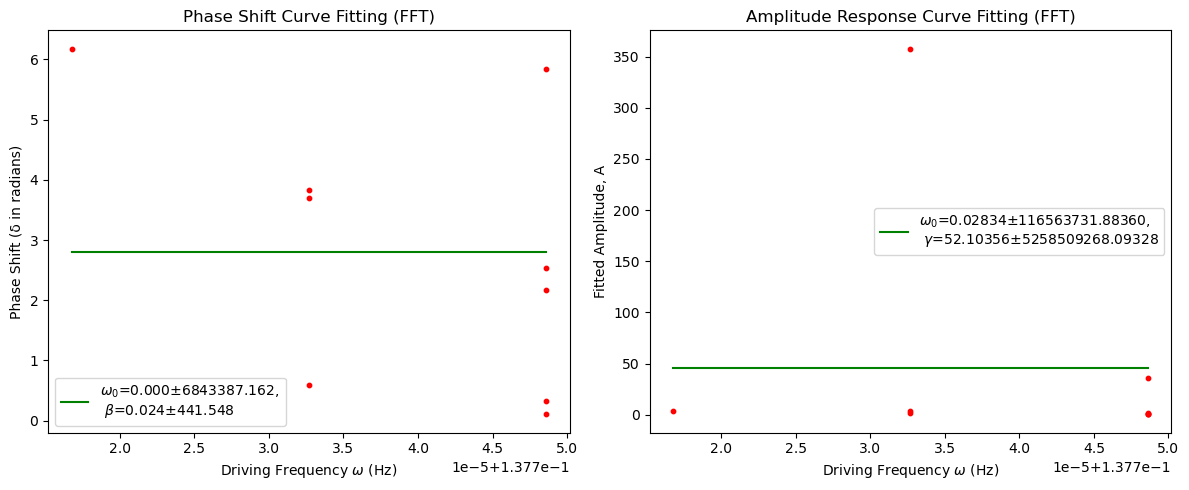

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq
from scipy.optimize import curve_fit

# Define the phase shift function using cos^-1
def phase_shift_model(omega, omega_0, beta):
    cos_delta = (omega_0**2 - omega**2) / np.sqrt((omega_0**2 - omega**2)**2 + 4 * omega**2 * beta**2)
    return np.arccos(cos_delta)

# Define the Lorentzian function for curve fitting
def lorentzian(omega, A0, omega0, gamma):
    return A0 / np.sqrt((omega0**2 - omega**2)**2 + (gamma * omega)**2)

def analyze_fourier_response(omega_vals, times, amps, drs):
    """
    Performs Fourier analysis on multiple trials of oscillator response data and fits phase shift and amplitude response curves.
    """
    num_trials = len(omega_vals)
    amp_response = np.zeros(num_trials)
    phase_differences = np.zeros(num_trials)

    for i in range(num_trials):
        time = times[i, :]
        amp_signal = amps[i, :]
        dr_signal = drs[i, :]

        # Remove NaNs if present
        valid_indices = ~np.isnan(time) & ~np.isnan(amp_signal) & ~np.isnan(dr_signal)
        time = time[valid_indices]
        amp_signal = amp_signal[valid_indices]
        dr_signal = dr_signal[valid_indices]

        if len(time) == 0:
            print(f"Skipping Trial {i+1} due to missing data.")
            continue

        # Compute sampling properties
        dt = time[1] - time[0]  # Time step (assume uniform spacing)
        N = len(time)  # Number of points

        # Compute Fourier Transforms
        freqs = fftfreq(N, dt)  # Frequency values
        amp_fft = fft(amp_signal)
        dr_fft = fft(dr_signal)
        
        # Find the index closest to the driving frequency
        target_freq = omega_vals[i] / (2 * np.pi)  # Convert omega to Hz
        closest_index = np.argmin(np.abs(freqs - target_freq))

        # Compute amplitude response |A(ω)|
        amp_response[i] = np.abs(amp_fft[closest_index]) / np.abs(dr_fft[closest_index])

        # Compute phase response δ(ω) = φ_V(ω) - φ_r(ω)
        phi_V = np.angle(amp_fft[closest_index])
        phi_r = np.angle(dr_fft[closest_index])
        delta_w = (phi_r - phi_V + np.pi) % (2 * np.pi)  # Normalize to [-π, π]
        phase_differences[i] = delta_w

    # Remove NaNs for fitting
    valid_indices = ~np.isnan(omega_vals) & ~np.isnan(amp_response) & ~np.isnan(phase_differences)
    omega_valid = omega_vals[valid_indices] / (2 * np.pi)  # Convert to Hz
    amp_response_valid = amp_response[valid_indices]
    phase_differences_valid = phase_differences[valid_indices]

    # Fit phase shift model
    initial_guess_phase = [2.0, 0.5]
    popt_phase, pcov_phase = curve_fit(phase_shift_model, omega_valid, phase_differences_valid, p0=initial_guess_phase, bounds=([0, 0], [np.inf, np.inf]))
    omega_0_fit_phase, beta_fit_phase = popt_phase
    omega_0_err_phase, beta_err_phase = np.sqrt(np.diag(pcov_phase))
    omega_fit_phase = np.linspace(np.min(omega_valid), np.max(omega_valid), 500)
    delta_fit = phase_shift_model(omega_fit_phase, omega_0_fit_phase, beta_fit_phase)

    # Fit amplitude response model
    initial_guess_amp = [np.max(amp_response_valid), omega_valid[np.argmax(amp_response_valid)], (np.max(omega_valid) - np.min(omega_valid)) / 10]
    popt_amp, pcov_amp = curve_fit(lorentzian, omega_valid, amp_response_valid, p0=initial_guess_amp, bounds=([0, 0, 0], [np.inf, np.inf, np.inf]))
    A0_fit_amp, omega0_fit_amp, gamma_fit_amp = popt_amp
    A0_err_amp, omega0_err_amp, gamma_err_amp = np.sqrt(np.diag(pcov_amp))
    omega_fit_amp = np.linspace(np.min(omega_valid), np.max(omega_valid), 500)
    A_fit_curve = lorentzian(omega_fit_amp, A0_fit_amp, omega0_fit_amp, gamma_fit_amp)

    # Create subplots for FFT results
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Phase shift plot (FFT)
    axs[0].scatter(omega_valid, phase_differences_valid, color='red', s=10)
    axs[0].plot(omega_fit_phase, delta_fit, linestyle='-', color='green', 
                label=f'$\\omega_0$={omega_0_fit_phase:.3f}±{omega_0_err_phase:.3f}, \n $\\beta$={beta_fit_phase:.3f}±{beta_err_phase:.3f}')
    axs[0].set_xlabel(r'Driving Frequency $\omega$ (Hz)')
    axs[0].set_ylabel('Phase Shift (δ in radians)')
    axs[0].set_title('Phase Shift Curve Fitting (FFT)')
    axs[0].legend()
    axs[0].grid(False)

    # Amplitude response plot (FFT)
    axs[1].scatter(omega_valid, amp_response_valid, color='red', s=10)
    axs[1].plot(omega_fit_amp, A_fit_curve, linestyle='-', color='green', 
                label=f'$\\omega_0$={omega0_fit_amp:.5f}±{omega0_err_amp:.5f}, \n $\\gamma$={gamma_fit_amp:.5f}±{gamma_err_amp:.5f}')
    axs[1].set_xlabel(r'Driving Frequency $\omega$ (Hz)')
    axs[1].set_ylabel('Fitted Amplitude, A')
    axs[1].set_title(r'Amplitude Response Curve Fitting (FFT)')
    axs[1].legend()
    axs[1].grid(False)

    plt.tight_layout()
    plt.show()

    return amp_response, phase_differences

# Read CSV data
df = pd.read_csv('/Users/willgray/Downloads/part-2-data-12trails.csv')  # Replace 'your_data.csv' with your CSV file path

# Extract data for each run (Trials 2-13)
runs = range(2, 14)  # Runs 2 through 13 (12 trials)
times_list = []
amps_list = []
drs_list = []

for run in runs:
    # Extract columns for the current run
    time_col = f'Time (s) Run #{run}'
    chA_col = f'Voltage, Ch A (V) Run #{run}'
    chB_col = f'Voltage, Ch B (V) Run #{run}'
    
    times_list.append(df[time_col].values)
    amps_list.append(df[chA_col].values)  # Assuming Ch A is the oscillator's amplitude
    drs_list.append(df[chB_col].values)   # Assuming Ch B is the driving signal

# Convert to 2D numpy arrays (trials x time_points)
times = np.array(times_list)
amps = np.array(amps_list)
drs = np.array(drs_list)

# Example usage (replace with your actual omega_vals)
omega_vals = np.array([0.8655, 0.8655, 0.8655, 0.8655, 0.8653, 0.8655, 0.8654, 0.8654, 0.8654])

# Perform analysis
amp_response_fft, phase_differences_fft = analyze_fourier_response(omega_vals, times, amps, drs)